In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [5]:
penguins=sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [7]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [14]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<AxesSubplot:>

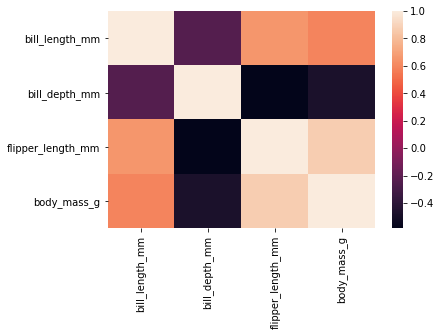

In [10]:
sns.heatmap(penguins.corr())

<AxesSubplot:>

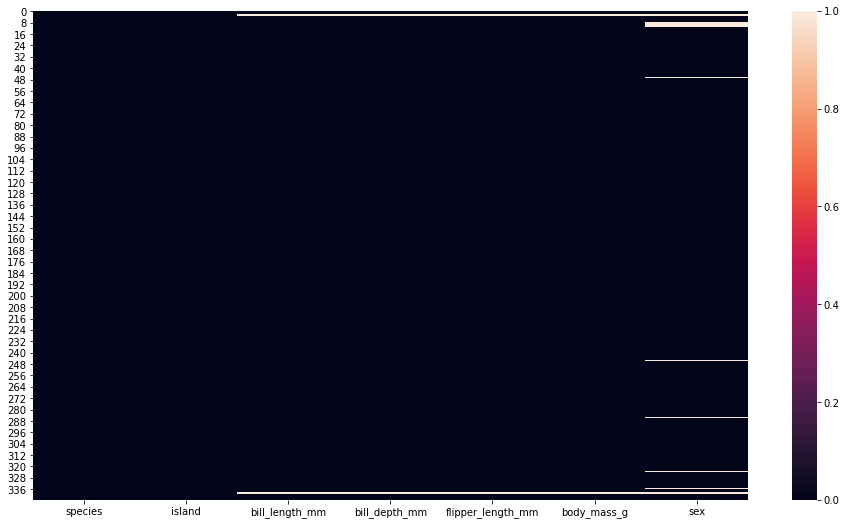

In [13]:
plt.figure(figsize=(16,9))
sns.heatmap(penguins.isnull())  # missing valulaeri incelemek için heat map kullanılır.

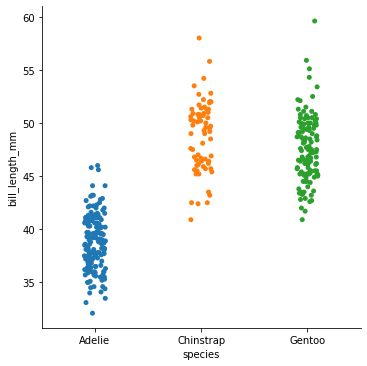

In [19]:
sns.catplot(data=penguins, x="species",y="bill_length_mm")  # x de cateegorikler y de numareciler

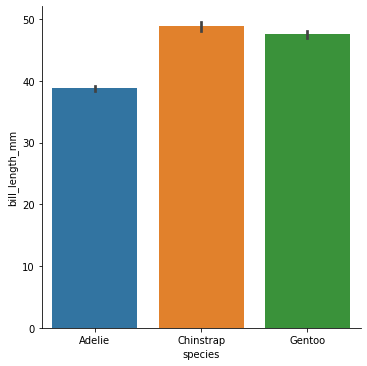

In [21]:
sns.catplot(data=penguins, x="species",y="bill_length_mm",kind="bar",estimator="mean")  # x de cateegorikler y de numareciler
# estimator ne ile çalışsın ort örnek

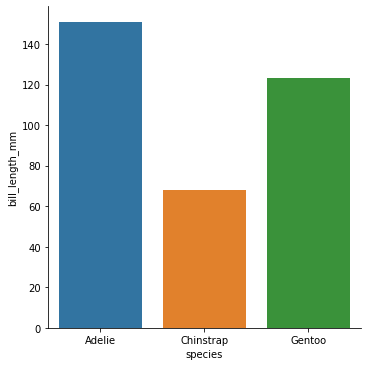

In [22]:
sns.catplot(data=penguins, x="species",y="bill_length_mm",kind="bar",estimator=np.count_nonzero)  # 
                                                       # estimator ne ile çalışsın ort count non zero ları topladı

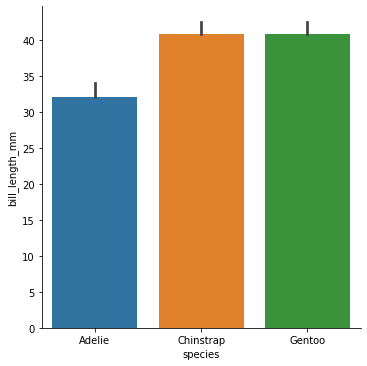

In [23]:
sns.catplot(data=penguins, x="species",y="bill_length_mm",kind="bar",estimator=np.min)  # 
     # işlemi belirler, estimator ne ile çalışsın minleri aldı cinsler aşağıda yanda rakkamlar.

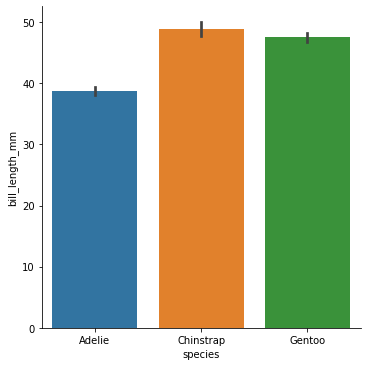

In [26]:
sns.catplot(data=penguins, x="species",y="bill_length_mm",kind="bar",estimator=np.mean,ci=99)  # ci default 95 
     # GÜVEN aralığı -----ci------ estimator verilerin % 95 bu aralıkta alt 2sd üste 2sd dar dağılım aslında

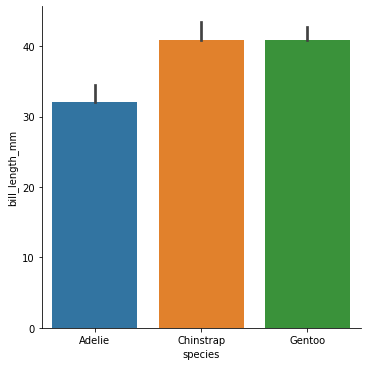

In [27]:
sns.catplot(data=penguins, x="species",y="bill_length_mm",kind="bar",estimator=np.min,ci=99)  # ci default 95 
     # GÜVEN aralığı min değerlerin üstünde oldu verilerin % 95 bu aralıkta alt 2sd üste 2sd dar dağılım aslında

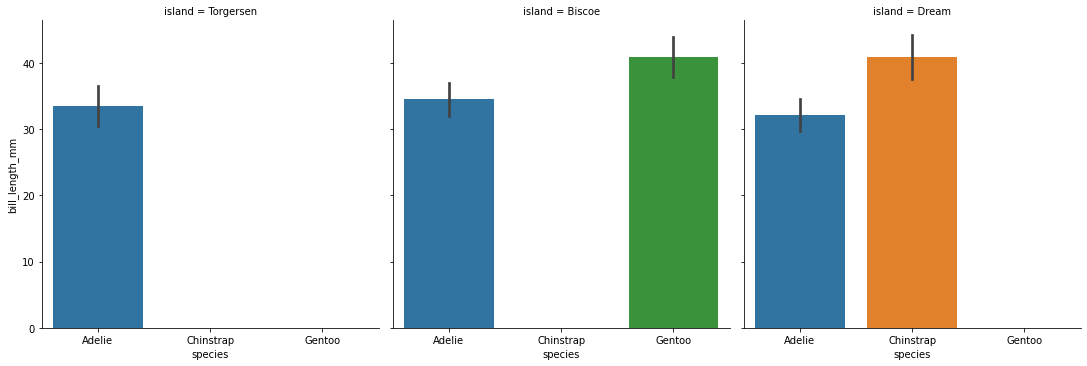

In [28]:
sns.catplot(data=penguins, x="species",y="bill_length_mm",kind="bar",estimator=np.min,ci="sd",col="island")
           # columns verdik onada island dedik adaları ayırdık cinsiyette olur onuda rowa verelim

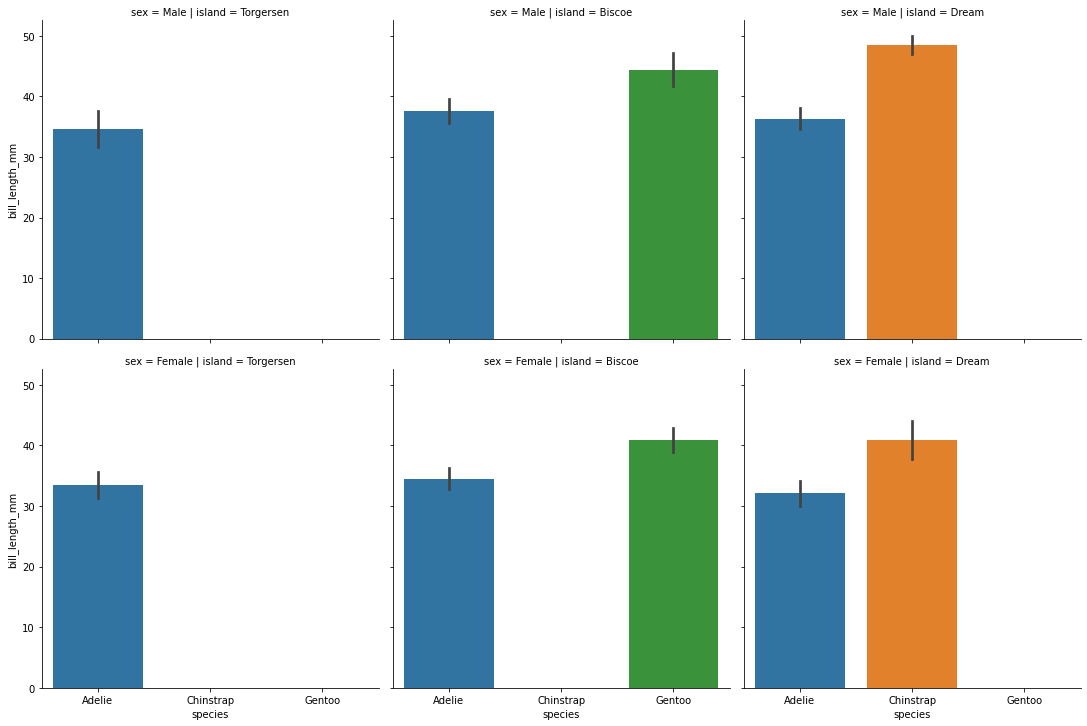

In [29]:
sns.catplot(data=penguins, x="species",y="bill_length_mm",kind="bar",estimator=np.min,ci="sd",col="island",row="sex")
           # columns verdik onada island dedik adaları ayırdık cinsiyette olur onuda rowa verelim

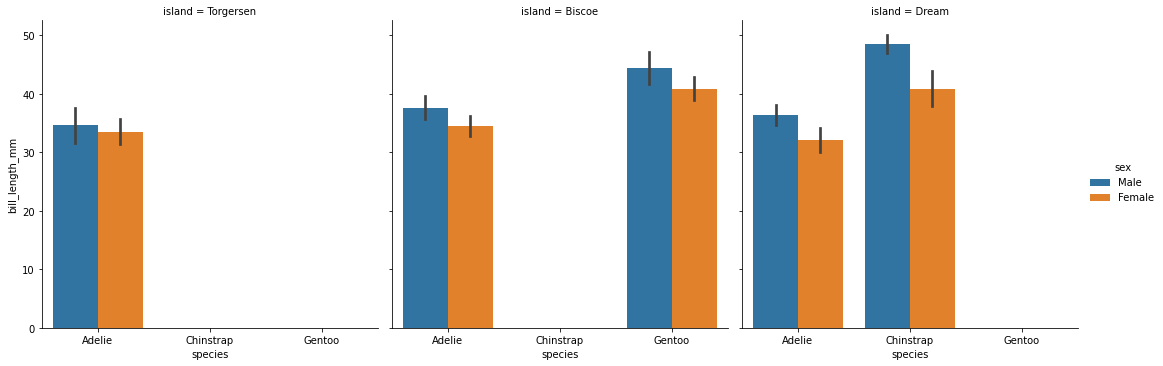

In [31]:
sns.catplot(data=penguins, x="species",y="bill_length_mm",kind="bar",estimator=np.min,ci="sd",col="island",hue="sex")
           # columns verdik onada island dedik adaları ayırdık cinsiyette olur şimdi onu hue yeverdik

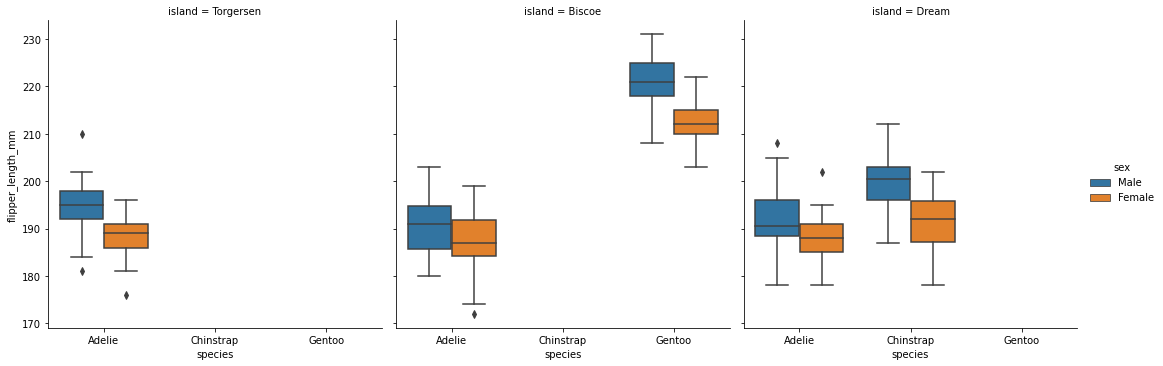

In [33]:
sns.catplot(data=penguins, x="species",y="flipper_length_mm",kind="box",col="island",hue="sex") # 3 dimension
# columns verdik onada island dedik adaları ayırdık cinsiyette olur şimdi onu hue yeverdik,yüzgeç.

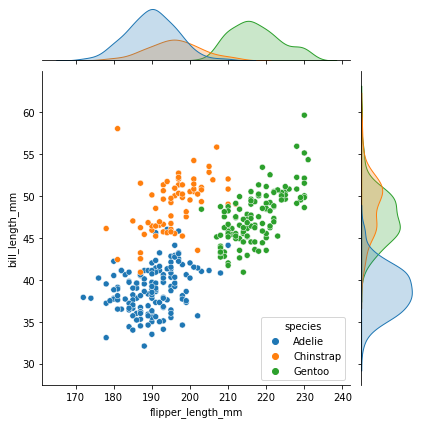

In [44]:
sns.jointplot(data=penguins,x="flipper_length_mm",y="bill_length_mm",hue="species")
#scatter yaptı dışnada histogram yaptı, turuncular arada gagaların uzunluğu ve genişliğine göre

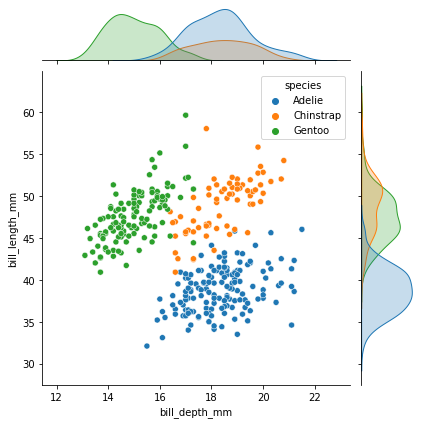

In [45]:
sns.jointplot(data=penguins,x="bill_depth_mm",y="bill_length_mm",hue="species")
#scatter yaptı dışnada histogram yaptı, turuncular arada gagaların uzunluğu ve genişliğine göre

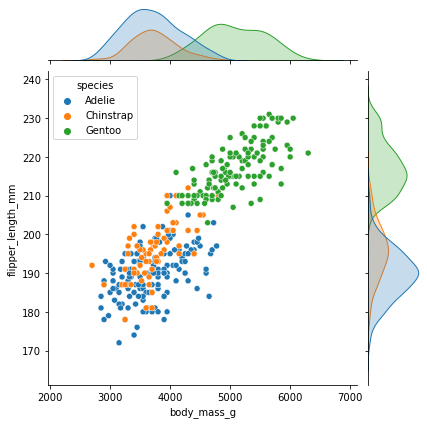

In [48]:
sns.jointplot(data = penguins, x="body_mass_g", y="flipper_length_mm", hue="species")
# grafik kendince bu çok anlamlı olmadı. hue eklenince kde oldu
# 2 değer numeric hue categori..------------------

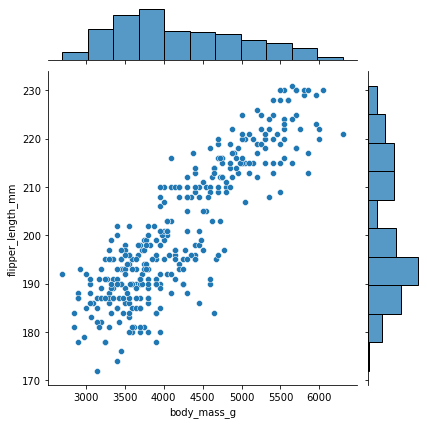

In [47]:
sns.jointplot(data = penguins, x="body_mass_g", y="flipper_length_mm")
# iki tarafta numeric

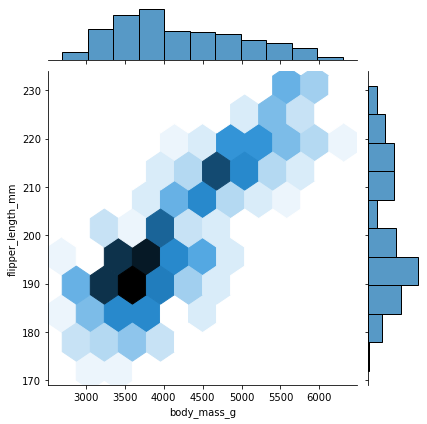

In [49]:
sns.jointplot(data = penguins, x="body_mass_g", y="flipper_length_mm",kind="hex")
# "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" 
# iki tarafta numeric

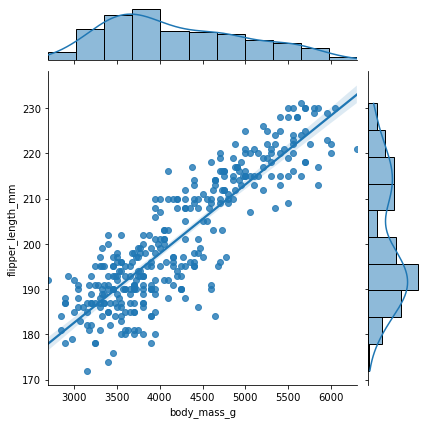

In [50]:
sns.jointplot(data = penguins, x="body_mass_g", y="flipper_length_mm",kind="reg")
# "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" 
#reg verdik 

<Figure size 1152x648 with 0 Axes>

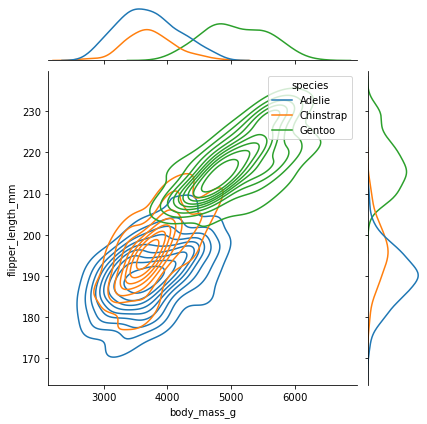

In [52]:
plt.figure(figsize=(16,9))
sns.jointplot(data = penguins, x="body_mass_g", y="flipper_length_mm",hue="species",kind="kde")
# "scatter" | "kde" | "hist" | "hex" | "reg" | "resid"       #izohips

# pairplot
Pairplot:  (sns.pairplot(data=tips))
datasetini pairplot'un içine atıyorsun ve o tüm featureların birbiri ile grafiklerini çiziyor. Bunu parça parça da yapabilirsin. ilk 5'ini sonraki 5'ini gibi.
bir EDA'ya veya bir görselleştirmeye başlarken tüm datasetinin birbirleri ile görsel ilişkisini yakalamak için bir pairplot kullanırız ve patern yakalamaya çalışırız. daha sonra diyelim orda iki feature arasında bir ilişki gördünüz orada detay çalışmak için diğer plotları kullanırsın.
hem tek değişkenlerin dağılımını hem de iki değişken arasındaki ilişkiyi görmenizi sağlar

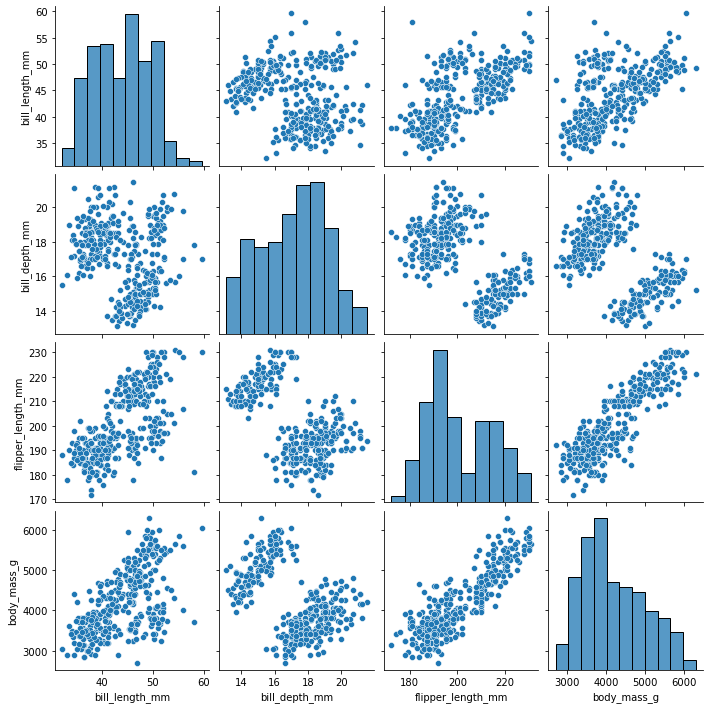

In [53]:
sns.pairplot(penguins)  # sayısal değerleri alır yansıtır.

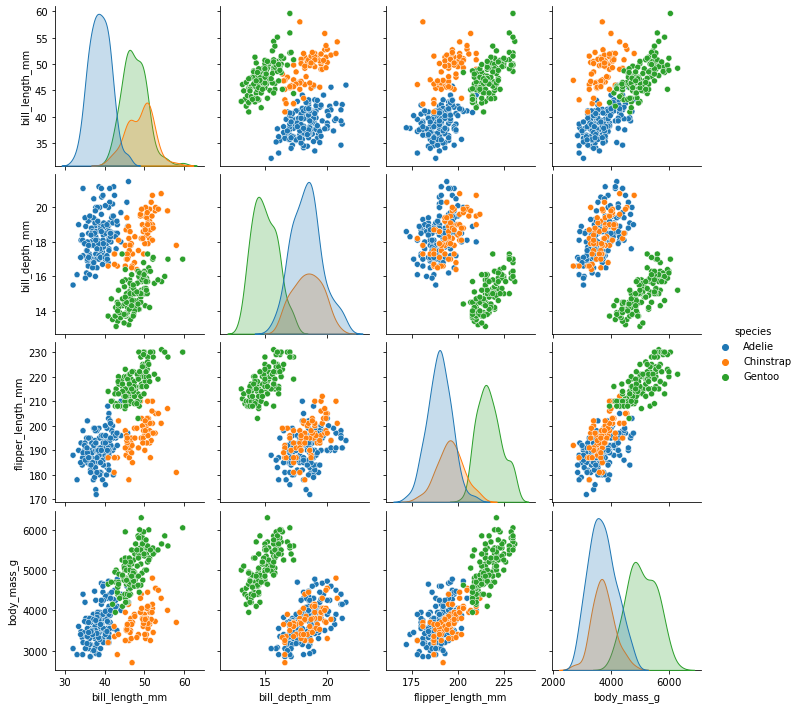

In [54]:
sns.pairplot(penguins,hue="species")  # sayısal değerleri alır yansıtır.

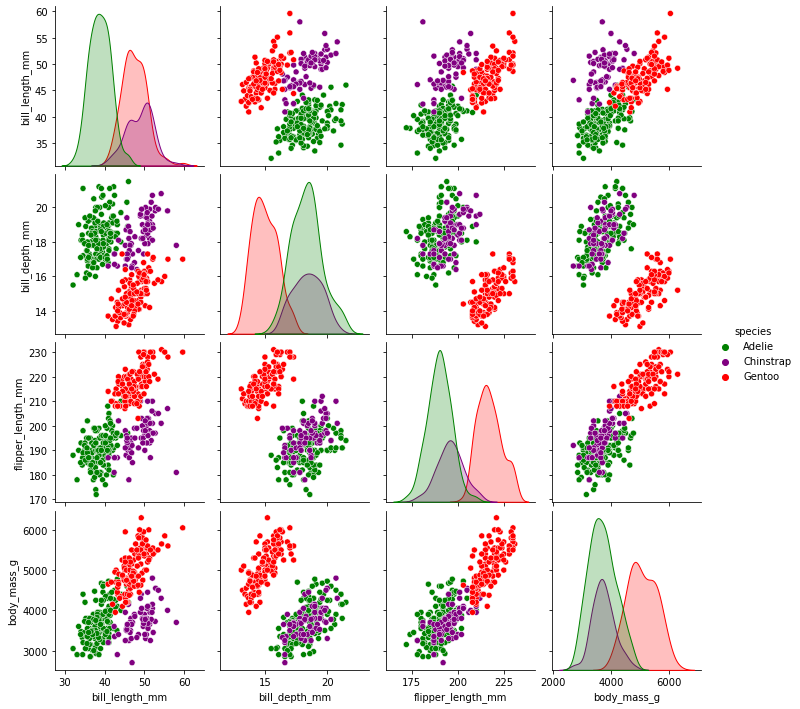

In [55]:
sns.set_palette(['green', 'purple', 'red'])
sns.pairplot(penguins, hue="species")  # kendi paletimide oluşturdum orjınalde x y ye göre ayrıayrıalınmış.

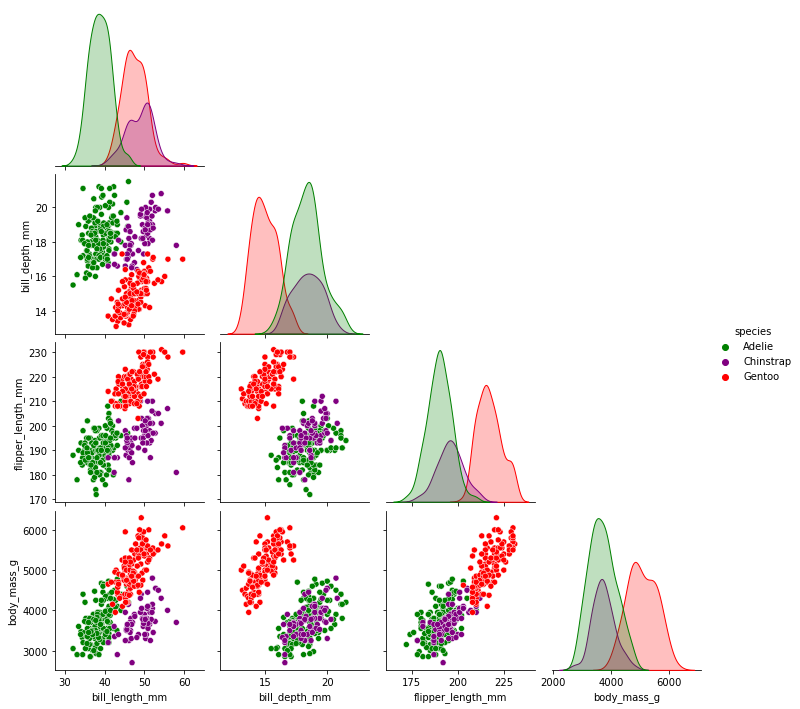

In [56]:
sns.set_palette(['green', 'purple', 'red'])
sns.pairplot(penguins, hue="species",corner=True) 
# kendi paletimide oluşturdum orjınalde x y ye göre ayrıayrıalınmış.  corner tekrarlanmadı.

# Yeşil mor kırmızı ayrışma en güzel 2'e 1, 3'e 1 ve 4'e 1 hücrelerinde mevcut.
Dikkat et bunların üçünde de bill_length mutlaka var. Demek ki bu feature'ım benim datamdaki ayrışmalar için temel değerdir! Yani bill_length diğer feature'lara göre daha belirgin ayrışma sağlıyor.
Bill_length benim için kesinlikle önemli bir veri!

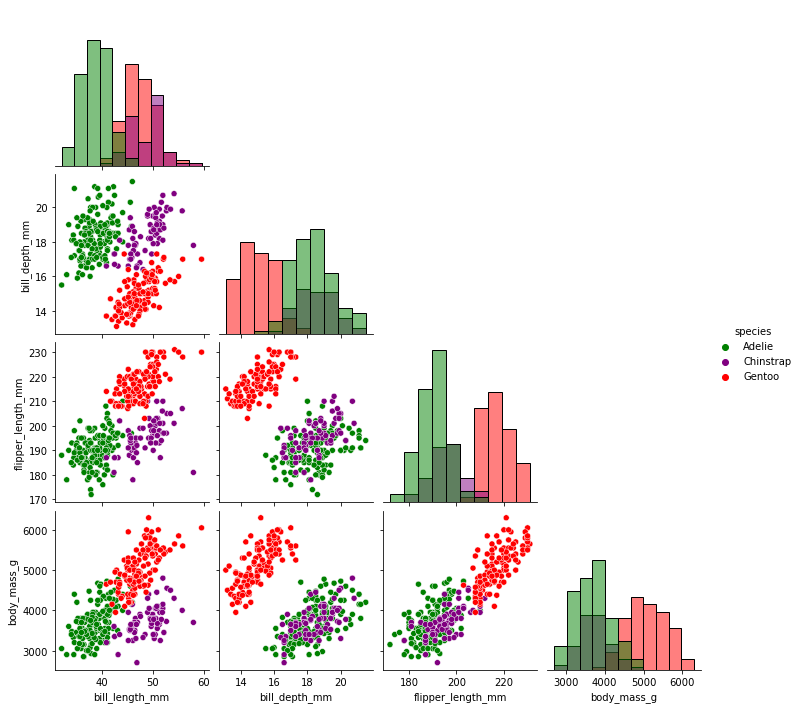

In [57]:
sns.set_palette(['green', 'purple', 'red'])
sns.pairplot(penguins, hue="species",corner=True,diag_kind="hist") 
# kendi paletimide oluşturdum orjınalde x y ye göre ayrıayrı alınmış. diagonaldeli beliledik.)

# pairgrid

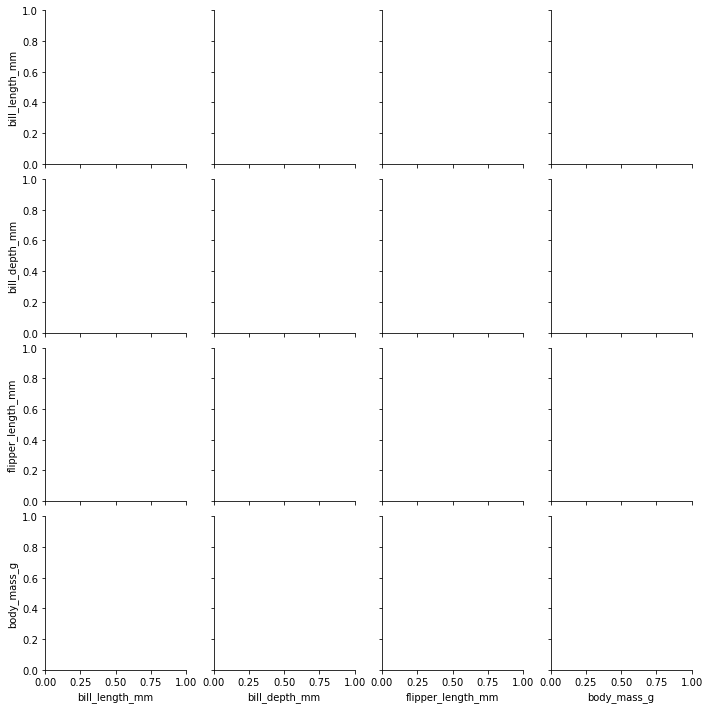

In [59]:
sns.PairGrid(penguins)  # hesapladı 4 4 lük 16 matris yaptı ne yapazımızı bizden bekliyor.

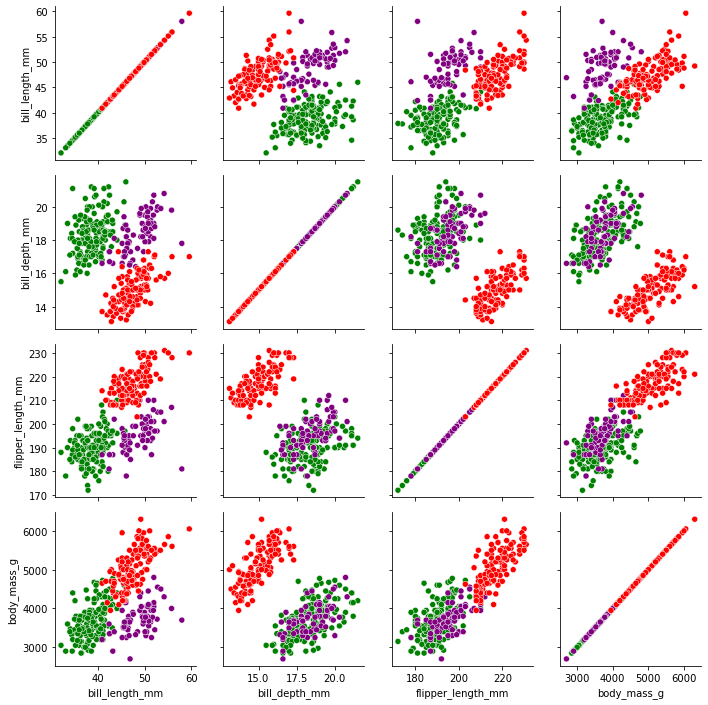

In [61]:
g=sns.PairGrid(penguins,hue="species")  # hangi plotsa onu yazdık
g.map(sns.scatterplot)

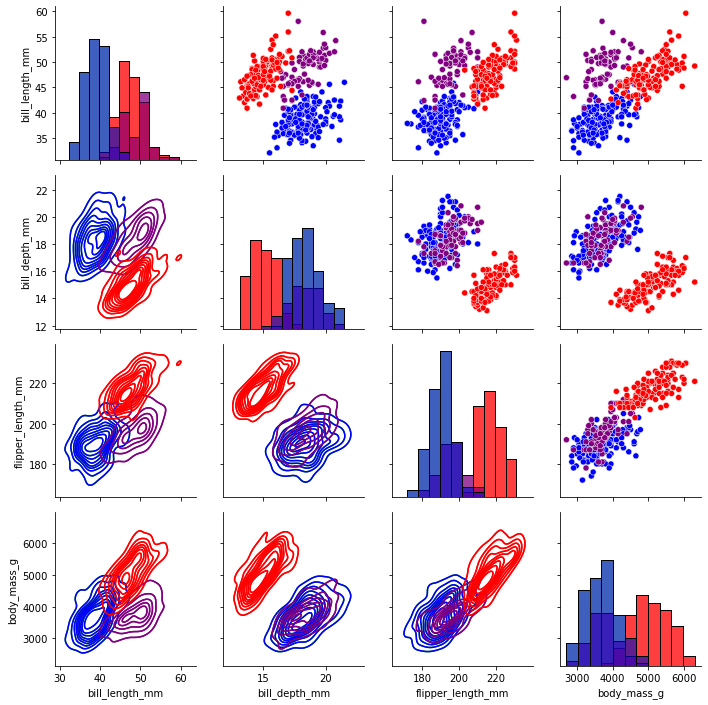

In [69]:
sns.set_palette(["blue", 'purple', 'red'])
sns.PairGrid(penguins,hue="species")  # hangi plotsa onu yazdık
g.map_diag(sns.histplot)      #  köşegen
g.map_upper(sns.scatterplot)  #  üstte
g.map_lower(sns.kdeplot)      #  altta

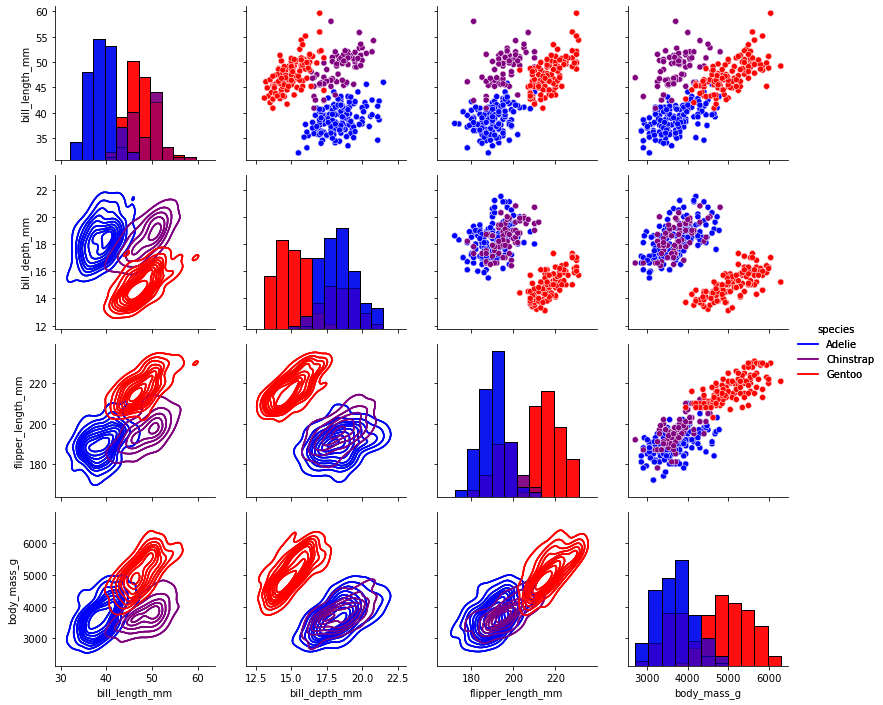

In [71]:
sns.set_palette(["blue", 'purple', 'red'])
sns.PairGrid(penguins,hue="species")  # hangi plotsa onu yazdık
g.map_diag(sns.histplot)      #  köşegen
g.map_upper(sns.scatterplot)  #  üstte
g.map_lower(sns.kdeplot)      #  altta
g.add_legend()                # pair gridde legende biz ekledik.

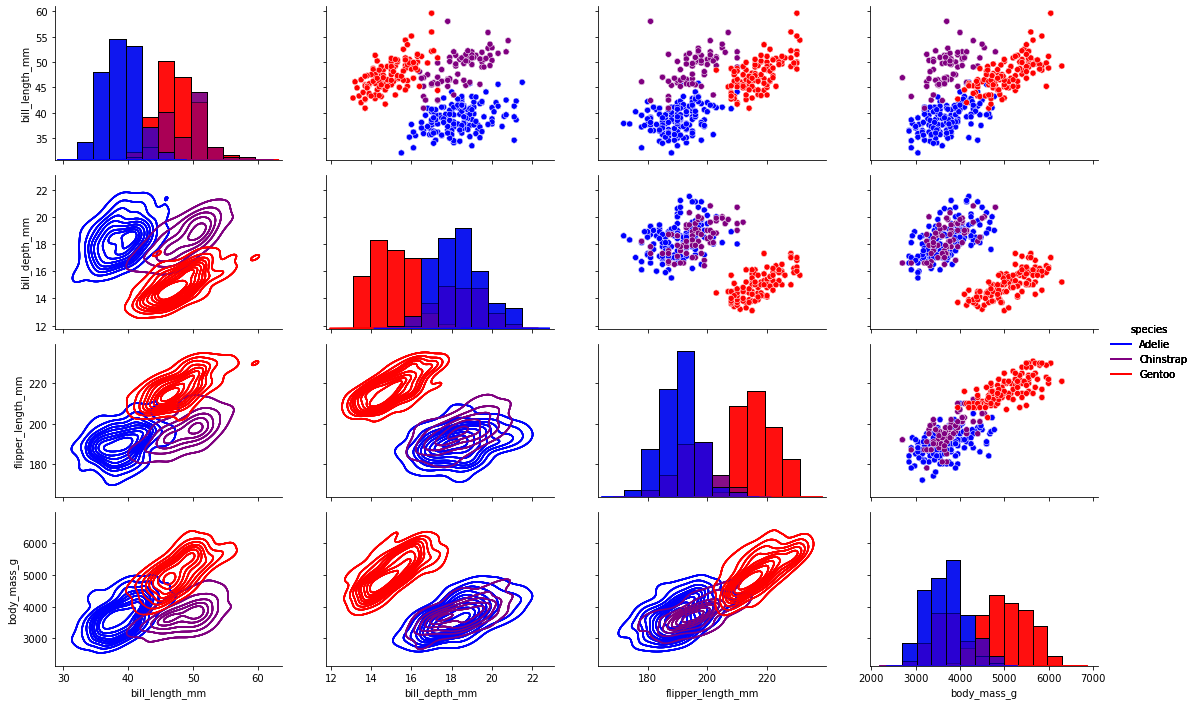

In [75]:
sns.set_palette(["blue", 'purple', 'red'])
sns.PairGrid(penguins,hue="species",diag_sharey=False)  # hangi plotsa onu yazdık

g.map_diag(sns.kdeplot)      #  köşegen
g.map_upper(sns.scatterplot)  #  üstte
g.map_lower(sns.kdeplot)      #  altta

g.add_legend()                # pair gridde legende biz ekledik.

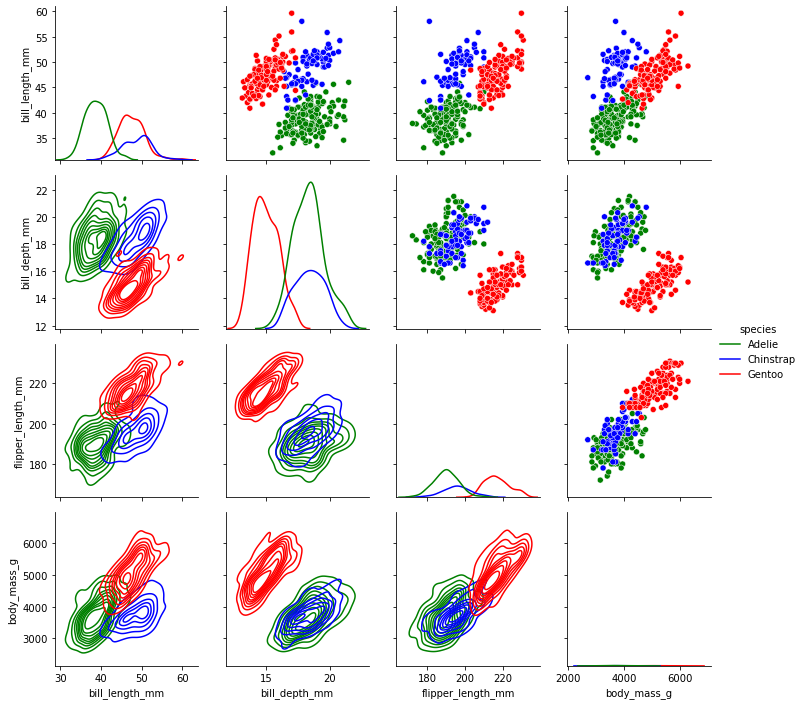

In [78]:
sns.set_palette(["green","blue","red"])
g = sns.PairGrid(penguins, hue = "species")     # satır sütün yap
g.map_upper(sns.scatterplot);                   # satır sütün yap
g.map_diag(sns.kdeplot);                       # satır sütün yap
g.map_lower(sns.kdeplot);                       # ayrı ayrı belirledik
g.add_legend();

In [ ]:
sns.set_palette(["green","blue","red"])
g = sns.PairGrid(penguins, hue = "species",diag_sharey=False)     # sharey yaptık y eksenine göre yapınca yere yapıştı
g.map_upper(sns.scatterplot);                                     # satır sütün yap
g.map_diag(sns.kdeplot);                                          # satır sütün yap
g.map_lower(sns.kdeplot);                                        # ayrı ayrı belirledik
g.add_legend();                   # diag_sharey=False  önemli y eksenine göre bağımlı kalmadık gibi

# FacetGrid

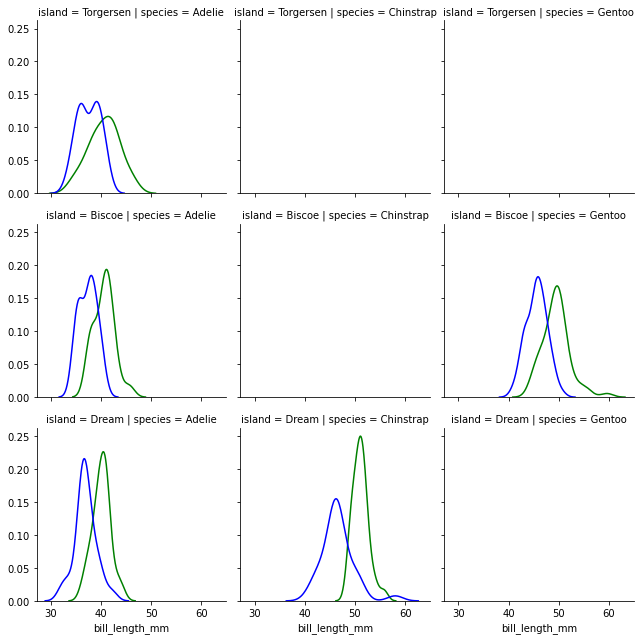

In [90]:
g = sns.FacetGrid(data=penguins,col="species",row="island",hue="sex")  
g.map(sns.kdeplot,"bill_length_mm")       # scatter 2 tane satır sütün istedi burda olmadı

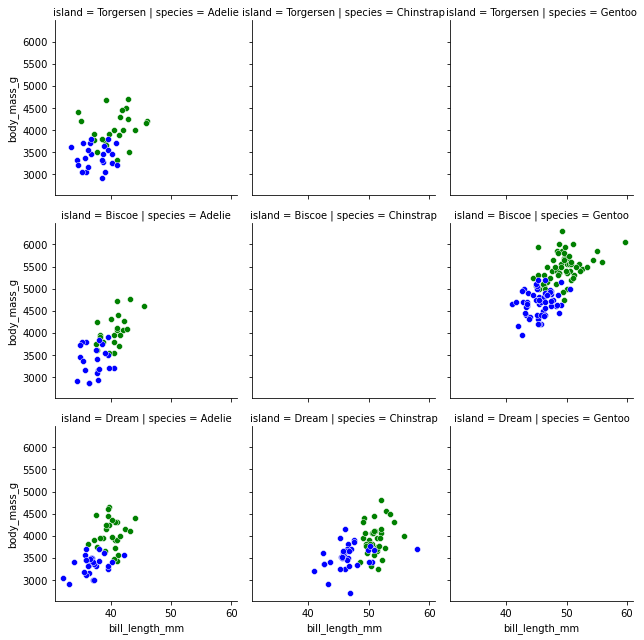

In [94]:
g = sns.FacetGrid(data=penguins,col="species",row="island",hue="sex")  
g.map(sns.scatterplot,"bill_length_mm","body_mass_g")       # scatter 2 tane satır sütün verdik

# heatmap

In [95]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [97]:
penguins.isnull()  # nan ları true dönderdi.

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [98]:
penguins.isnull().sum()  # nan ları true dönderdi.

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

<AxesSubplot:>

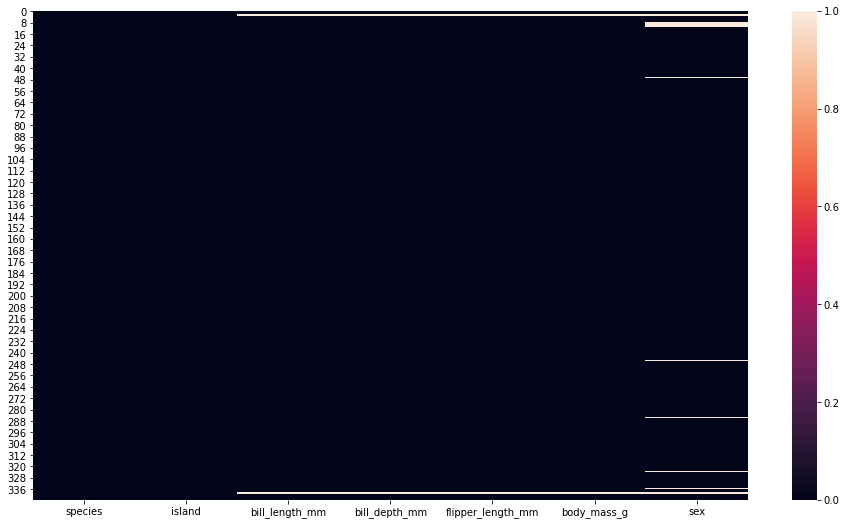

In [101]:
plt.figure(figsize=(16,9))
sns.heatmap(penguins.isnull())  # burda true false olan df i içinde verdik, sağda beyaz olan yerler 344 satır içinde true dönenleri verdi

<AxesSubplot:>

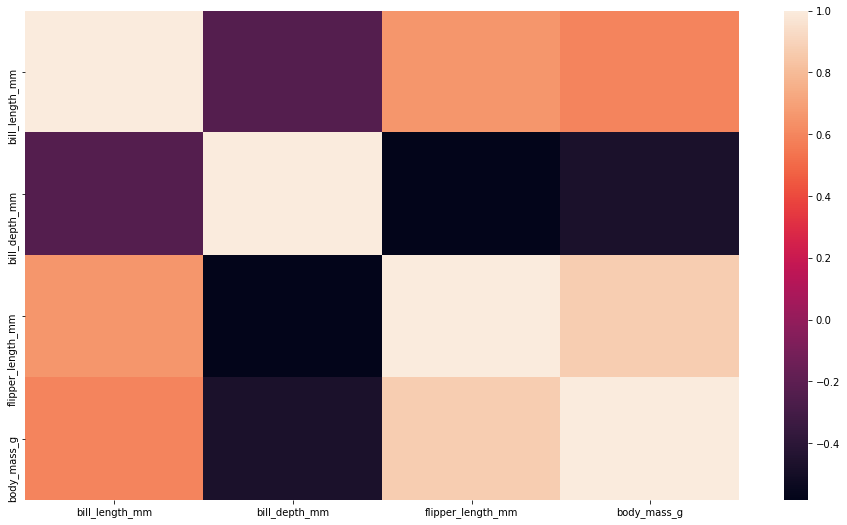

In [102]:
plt.figure(figsize=(16,9))
sns.heatmap(penguins.corr())  # burda  corr a baktık, diagonal beyaz kendi arasında

<AxesSubplot:>

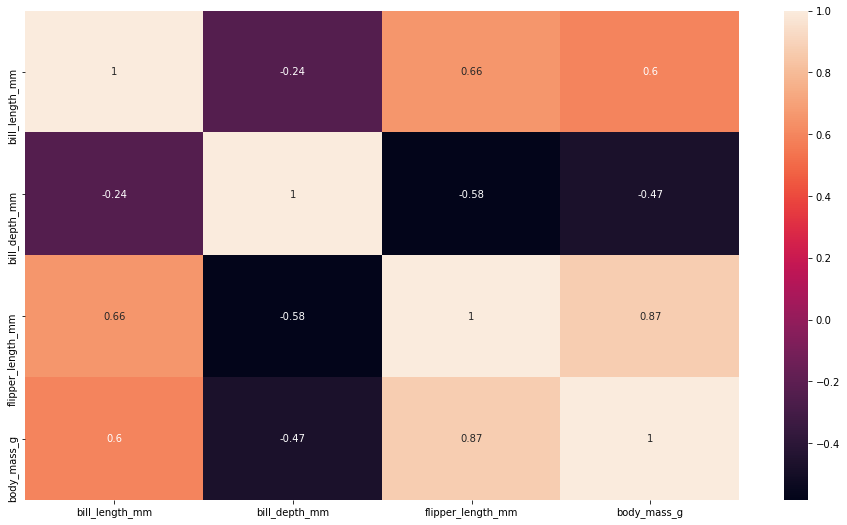

In [104]:
plt.figure(figsize=(16,9))
sns.heatmap(penguins.corr(),annot=True)  # burda  corr a baktık, diagonal beyaz kendi arasında, annot yazı yazdırdık
                                         # 0,68 ile, 0,87 coor değerleri var kanat uzunluğu uzun olanın vucüt ağırlığı artmış...
    # gaganın derinliği ile uzunluğu arasında çok anlamlı durmdı -,24 olan değer 0 'a yakın diye'

<AxesSubplot:>

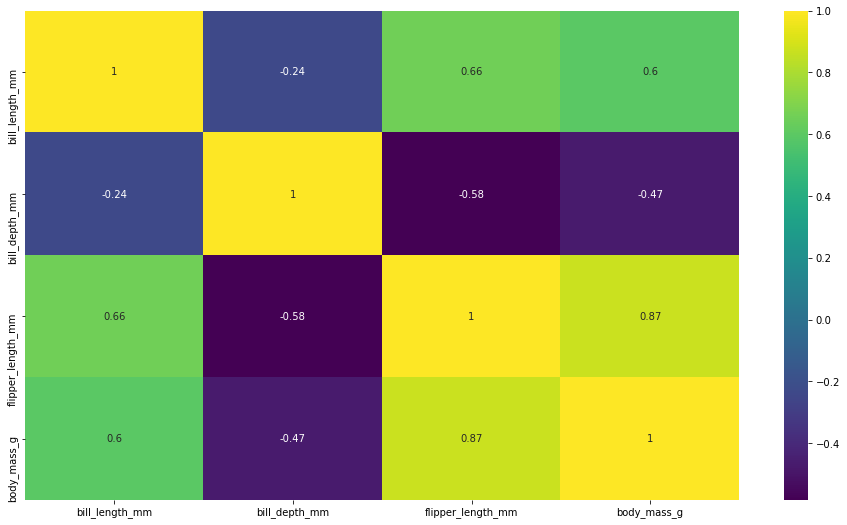

In [105]:
plt.figure(figsize=(16,9))
sns.heatmap(penguins.corr(),annot=True,cmap="viridis") 
# burda  corr a baktık, diagonal beyaz kendi arasında, annot yazı yazdırdık renk verdik cmap ile

<AxesSubplot:>

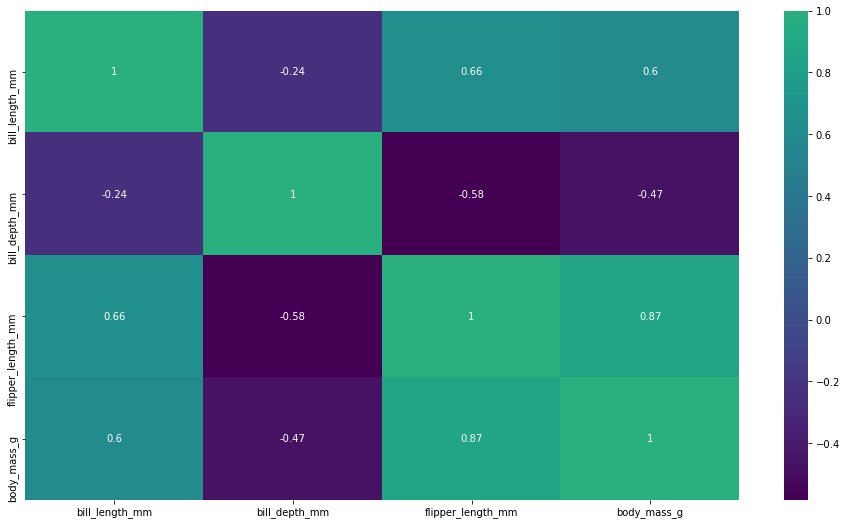

In [106]:
plt.figure(figsize=(16,9))
sns.heatmap(penguins.corr(),annot=True,cmap="viridis",center=0.66) 
# burda  corr a baktık, diagonal beyaz kendi arasında, annot yazı yazdırdık renk verdik cmap ile center renk merkezi verdik

# clustermap

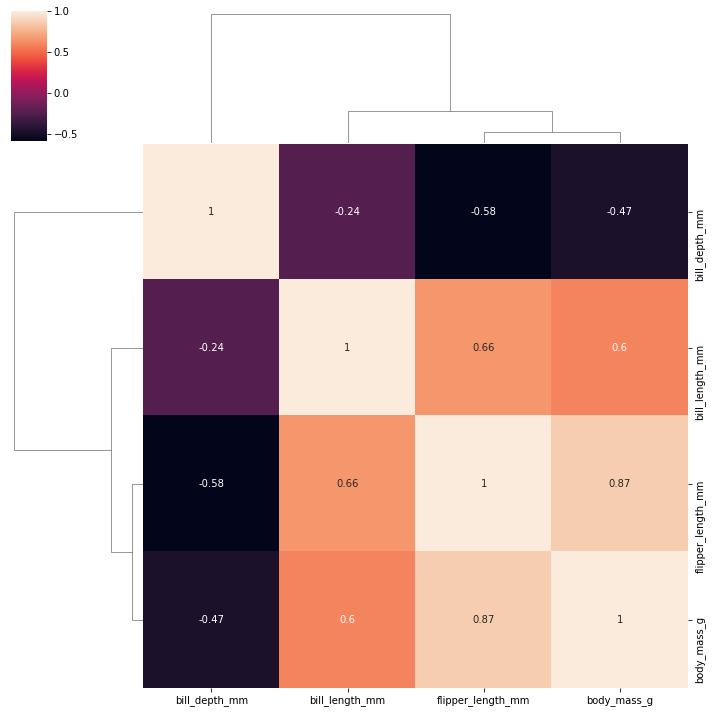

In [108]:
sns.clustermap(penguins.corr(),annot=True)# yukardaki çizgiler ayni kumeye girebilecekler

AttributeError: 'ClusterGrid' object has no attribute 'T'

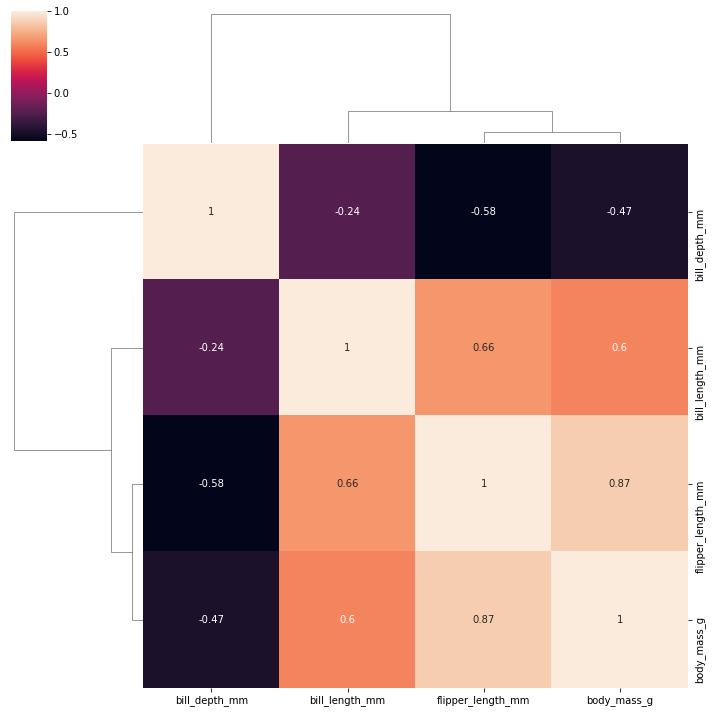

In [109]:
sns.clustermap(penguins.corr(),annot=True).T   # yukardaki çizgiler ayni kumeye girebilecekler kaç kümeye böleceksek onu verir gibi